# Task 4: Demonstrating Quantum Advantage

In [1]:
"""
This task is intentionally open-ended, so no boilerplate code is provided.

You may use this notebook to develop your solution, or create a separate file if you prefer.
We recommend starting by copying over your previous implementations of the QRNG, TRNG, and PRNG.
Then, explore ways to modularize and combine these components to design a use case that
demonstrates the unique advantages of quantum randomness.

Your write-up can be included directly in this notebook or submitted separately.
You're welcome to prepare it as a Google Doc or LaTeX document and upload a PDF to the GitHub repository—
just be sure to clearly indicate where it can be found if it's not included here.
"""

"\nThis task is intentionally open-ended, so no boilerplate code is provided.\n\nYou may use this notebook to develop your solution, or create a separate file if you prefer.\nWe recommend starting by copying over your previous implementations of the QRNG, TRNG, and PRNG.\nThen, explore ways to modularize and combine these components to design a use case that\ndemonstrates the unique advantages of quantum randomness.\n\nYour write-up can be included directly in this notebook or submitted separately.\nYou're welcome to prepare it as a Google Doc or LaTeX document and upload a PDF to the GitHub repository—\njust be sure to clearly indicate where it can be found if it's not included here.\n"

In [2]:
%pip install requests
%pip install numpy
%pip install matplotlib
%pip install pyaudio
%pip install psutil
%pip install pandas
%pip install seaborn
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Package Imports - feel free to add what you think might be useful! 
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from scipy.stats import kstest, laplace
import hashlib
import struct
import psutil
import platform
import math
import pandas as pd
import seaborn as sns

In [4]:
def get_qrng_floats(n, min_val=0.0, max_val=1.0):
    url = "https://qrng.idqloud.com/api/1.0/double"
    headers = {"X-API-KEY": "aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"}
    max_chunk = 16
    results = []
    
    # Split requests into chunks
    for _ in range(n // max_chunk):
        response = requests.get(
            url,
            headers=headers,
            params={
                "min": str(min_val),
                "max": str(max_val),
                "quantity": str(max_chunk)
            }
        )
        response.raise_for_status()
        results.extend(response.json()['data'])
    
    # Handle remaining numbers
    remaining = n % max_chunk
    if remaining > 0:
        response = requests.get(
            url,
            headers=headers,
            params={
                "min": str(min_val),
                "max": str(max_val),
                "quantity": str(remaining)
            }
        )
        response.raise_for_status()
        results.extend(response.json()['data'])
    
    return np.array(results, dtype=np.float64)

In [5]:
def get_laplace_transform(P, epsilon):
    # P is the scaled random numbers from get_qrng_floats()
    # Epsilon is the threshold for privacy (smaller epsilon = more privacy = less utility)
    b = 1 / epsilon
    laplace = []
    for p in P:
        if p == 0:
            laplace.append(float('-inf'))
        elif p < 0.5:
            laplace.append(b * math.log(2 * p))
        else:
            laplace.append(-b * math.log(2 * (1 - p)))
    return laplace

In [6]:
random_numbers = get_qrng_floats(40)
print(random_numbers)


[0.4507716  0.78517679 0.6457213  0.218211   0.77126846 0.71727479
 0.06166979 0.95103772 0.93835319 0.36811429 0.22573079 0.87137449
 0.53875176 0.22644798 0.0258977  0.21856586 0.08438666 0.82203294
 0.92579758 0.07534893 0.52609175 0.28031254 0.78255124 0.68982253
 0.58170015 0.33031597 0.7939565  0.08832121 0.324787   0.20664812
 0.67320446 0.47498441 0.12854363 0.9291991  0.26945433 0.60374453
 0.95969859 0.75095321 0.97190791 0.32450635]


In [7]:
epsilon = 0.25
laplace_transform = get_laplace_transform(random_numbers, epsilon)

In [8]:
size = 20

changes = -np.random.poisson(2, size)
positive = 324 + np.maximum.reduce([changes, np.random.normal(0, 4, size).astype(int)]).cumsum()
total = 100000 + changes.cumsum()

In [9]:
hiv_df = pd.DataFrame(np.array([positive, total]).T, columns=["Positive", "Total"])
hiv_df.index = range(2000, 2020)

In [10]:
hiv_df["Percent"] = hiv_df["Positive"] / hiv_df["Total"]

In [11]:
display(hiv_df)

,Positive,Total,Percent
2000,325,99998,0.003250
2001,322,99995,0.003220
2002,324,99993,0.003240
2003,324,99991,0.003240
2004,321,99988,0.003210
2005,319,99986,0.003190
2006,321,99983,0.003211
2007,328,99983,0.003281
2008,325,99980,0.003251
2009,325,99979,0.003251


In [12]:
hiv_df_differential_privacy = hiv_df.copy(deep=True)
hiv_df_differential_privacy["Positive"] = hiv_df["Positive"] + np.array(laplace_transform[:20]).astype(int)
hiv_df_differential_privacy["Total"] = hiv_df["Total"] + np.array(laplace_transform[20:]).astype(int)
hiv_df_differential_privacy["Percent"] = hiv_df_differential_privacy["Positive"] / hiv_df_differential_privacy["Total"]

display(hiv_df_differential_privacy)

,Positive,Total,Percent
2000,325,99998,0.003250
2001,325,99993,0.003250
2002,325,99996,0.003250
2003,321,99992,0.003210
2004,324,99988,0.003240
2005,321,99985,0.003210
2006,313,99986,0.003130
2007,337,99977,0.003371
2008,333,99979,0.003331
2009,324,99976,0.003241


In [13]:
hiv_df.to_csv("hiv_data.csv", index=True)
hiv_df_differential_privacy.to_csv("hiv_data_dp.csv", index=True)

In [14]:
positive_corr = np.corrcoef(hiv_df['Positive'], hiv_df_differential_privacy['Positive'])[0, 1]
total_corr = np.corrcoef(hiv_df['Total'], hiv_df_differential_privacy['Total'])[0, 1]

print(f"Correlation between Positive columns: {positive_corr:.4f}")
print(f"Correlation between Total columns: {total_corr:.4f}")



Correlation between Positive columns: 0.7920
Correlation between Total columns: 0.9186


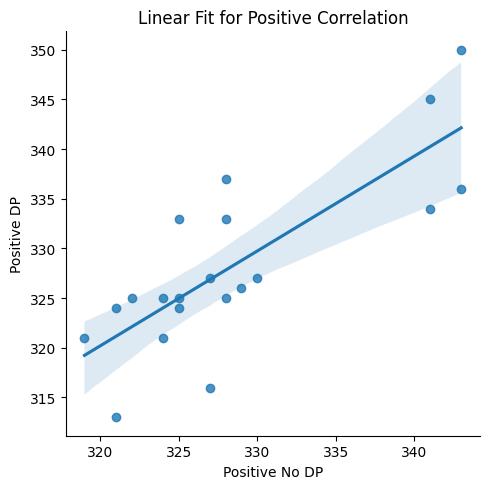

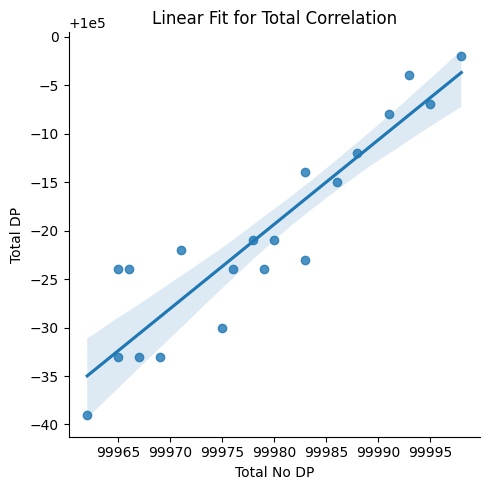

In [15]:
sns.lmplot(x='Positive No DP', y='Positive DP', data=pd.DataFrame({
    'Positive No DP': hiv_df['Positive'],
    'Positive DP': hiv_df_differential_privacy['Positive']
}))
plt.title('Linear Fit for Positive Correlation')
plt.tight_layout()
plt.show()

sns.lmplot(x='Total No DP', y='Total DP', data=pd.DataFrame({
    'Total No DP': hiv_df['Total'],
    'Total DP': hiv_df_differential_privacy['Total']
}))
plt.title('Linear Fit for Total Correlation')
plt.tight_layout()
plt.show()


In [23]:
def laplace_ks_test(series):
    # Data cleaning (probably not needed but just in case)
    data = series.dropna().values
    if len(data) < 2:
        return np.nan, np.nan
    
    loc = np.median(data)
    scale = np.mean(np.abs(data - loc))

    stat, pval = kstest(data, 'laplace', args=(loc, scale))
    return stat, pval

positive_stat, positive_p = laplace_ks_test(hiv_df_differential_privacy['Positive'])
total_stat, total_p = laplace_ks_test(hiv_df_differential_privacy['Total'])

print(f"'Positive' KS statistic = {positive_stat:.4f}, p-value = {positive_p:.4f}")
print(f"'Total' KS statistic = {total_stat:.4f}, p-value = {total_p:.4f}")


'Positive' KS statistic = 0.1963, p-value = 0.3750
'Total' KS statistic = 0.1650, p-value = 0.5907


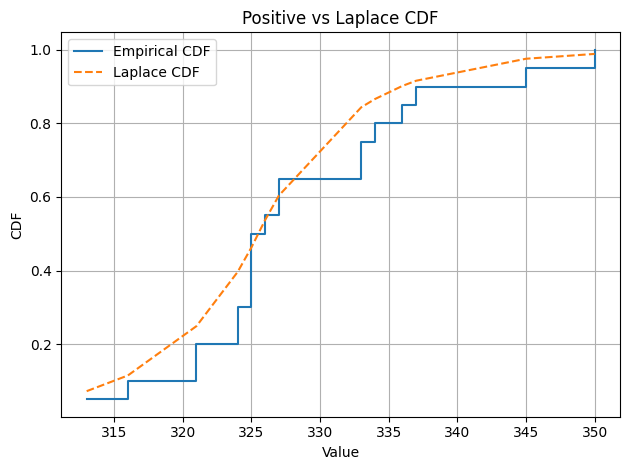

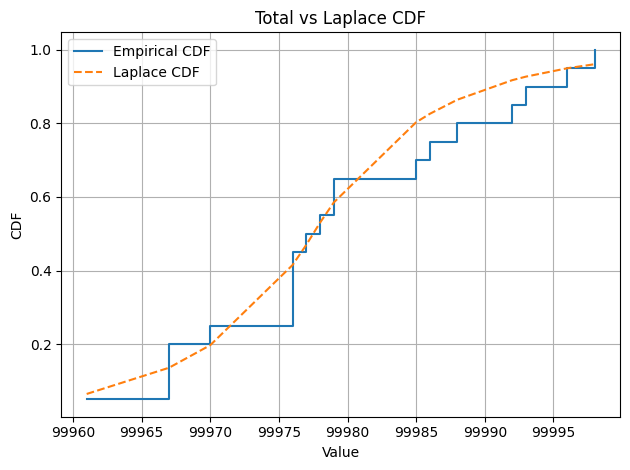

In [21]:
import matplotlib.pyplot as plt

def plot_cdf_vs_laplace(series, title):
    data = series.dropna().values
    data.sort()

    loc = np.median(data)
    scale = np.mean(np.abs(data - loc))

    # CDF from observed/empircal data
    ecdf = np.arange(1, len(data)+1) / len(data)
    # Theoretical CDF
    laplace_cdf = laplace.cdf(data, loc=loc, scale=scale)

    plt.plot(data, ecdf, drawstyle='steps-post', label='Empirical CDF')
    plt.plot(data, laplace_cdf, linestyle='--', label='Laplace CDF')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("CDF")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_cdf_vs_laplace(hiv_df_differential_privacy['Positive'], "Positive vs Laplace CDF")
plot_cdf_vs_laplace(hiv_df_differential_privacy['Total'], "Total vs Laplace CDF")
